In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score#The data intital scarce data is used to see the system perforamance 



In [2]:
Train = pd.read_csv('oldtrain.csv', delimiter=';', header=None)
Test = pd.read_csv('oldtest.csv', delimiter=';')

trainM = Train.as_matrix()
testM = Test.as_matrix()
ytrain = trainM[:, 0]
Xtrain = trainM[:, 1:]

ytest = testM[:, 0]
Xtest = testM[:, 1:]

C:\Users\aptr2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\aptr2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [3]:
#Decision tree model creation
destree = tree.DecisionTreeClassifier()
destree.fit(Xtrain, ytrain)
ydecpred = destree.predict(Xtest)


#Random forest  model creation
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain, ytrain)
rfc_pred = rfc.predict(Xtest)


#Perameter tuning for checking better K value 
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))


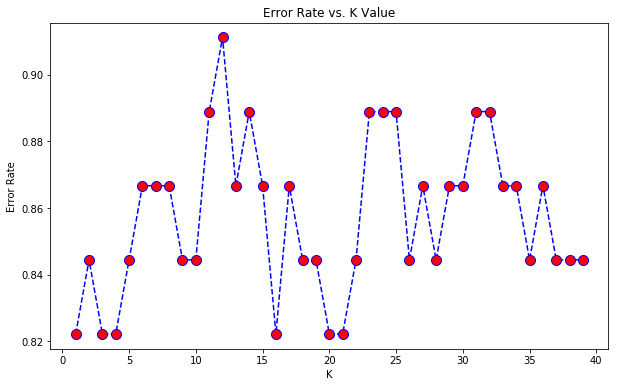

In [4]:
#Plotting the response of the graph between error rate and k value 

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [5]:
#Finally assigning best k value possible to model 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

# Cross validation score to check for perameter tuning 

knnscores = cross_val_score(knn, Xtrain, ytrain, cv=10)
DTscores = cross_val_score(destree, Xtrain, ytrain, cv=10)
RFscores = cross_val_score(rfc, Xtrain, ytrain, cv=10)


print("KNN Accuracy with 95 percent  confidence interval: %0.2f (+/- %0.2f)" % (knnscores.mean(), knnscores.std() * 2))
print("Decision Tree Accuracy with 95 percent  confidence interval: %0.2f (+/- %0.2f)" % (DTscores.mean(), DTscores.std() * 2))
print("Random Forest Accuracy with 95 percent  confidence interval: %0.2f (+/- %0.2f)" % (RFscores.mean(), RFscores.std() * 2))


print("-----------------------------------------------//////////////////////////////////////---------------------------------------------------------")
print("-----------------------------------------------Final evaluation results on Test data ---------------------------------------------------------")

print("KNN Accuracy:%.3f%%" % (metrics.accuracy_score(ytest, ypred) * 100.0))
# print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

print("Decision Tree Accuracy:%.3f%%" % (metrics.accuracy_score(ytest, ydecpred) * 100.0))
print(classification_report(ytest, ydecpred))
print("Random Forest Accuracy:%.3f%%" % (metrics.accuracy_score(ytest, rfc_pred) * 100.0))
print(classification_report(ytest, rfc_pred))

C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNN Accuracy with 95 percent  confidence interval: 0.14 (+/- 0.25)
Decision Tree Accuracy with 95 percent  confidence interval: 0.16 (+/- 0.23)
Random Forest Accuracy with 95 percent  confidence interval: 0.22 (+/- 0.21)
-----------------------------------------------//////////////////////////////////////---------------------------------------------------------
-----------------------------------------------Final evaluation results on Test data ---------------------------------------------------------
KNN Accuracy:17.778%
              precision    recall  f1-score   support

         0.0       0.20      0.29      0.24         7
         1.0       0.00      0.00      0.00         7
         2.0       1.00      0.14      0.25         7
         3.0       0.00      0.00      0.00         6
         4.0       0.15      0.80      0.26         5
         5.0       0.00      0.00      0.00         3
         6.0       0.33      0.17      0.22         6
         7.0       0.00      0.00      

C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

LR: 0.057273 (0.064801)


C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aptr2\Anacond

LDA: 0.075455 (0.115569)
KNN: 0.087273 (0.128513)
CART: 0.115455 (0.103736)
NB: 0.098182 (0.118377)


C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aptr2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SVM: 0.000000 (0.000000)


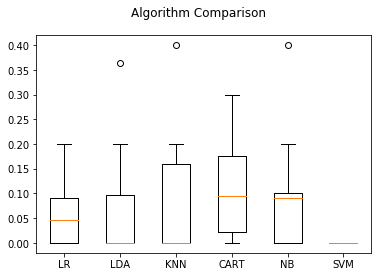

In [7]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()